# <center> 👉 class_09_5 » _Feature Descriptor - SIFT/SURF, ORB(FAST, BRIEF), Liquify_ </center>  
https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/?ref=lbp  
https://bkshin.tistory.com/entry/OpenCV-20     

## Feature Descriptor  

Descriptor is responsible for distinguishing between key points in different images.  
This feature point contains __information about the object's coordinates as well as its relationship to the pixels around it.__  
- The most representative of these are __the size and angle__ attributes.
- If it is a corner point, __the slope and direction of the corner are also attributes.__

__A feature descriptor is a gradient histogram of pixels__ belonging to each block by dividing the pixels around a feature point into blocks of a certain size.  
- It mainly contains information such as __brightness, color, orientation, and size around feature points.__

Depending on the extraction algorithm, the feature descriptor may vary slightly.
- In general, the size of the block around the feature point is often represented by a slope in eight directions (diagonal in up, down, left, right, and four directions).
- For a 4 x 4 block, each feature point has 4 x 4 x 8 = 128 values.

Descriptor란 서로 다른 이미지에서 특징점(Key Point)이 어떤 연관성을 가졌는지 구분하게 하는 역할   
이 특징점은 객체의 좌표뿐만 아니라 그 주변 픽셀과의 관계에 대한 정보를 가집니다.   
- 그중 가장 대표적인 것이 size와 angle 속성이며, 
- 코너(corner)점인 경우 코너의 경사도와 방향도 속성으로 가집니다. 
- 특징 디스크립터(feature descriptor)란 특징점 주변 픽셀을 일정한 크기의 블록으로 나누어 각 블록에 속한 픽셀의 그레디언트 히스토그램을 계산한 것입니다.   
- 주로 특징점 주변의 밝기, 색상, 방향, 크기 등의 정보가 포함되어 있습니다.   
- 추출하는 알고리즘에 따라 특징 디스크립터가 일부 달라질 수는 있습니다.   
- 일반적으로 특징점 주변의 블록 크기에 8방향(상, 하, 좌, 우 및 네 방향의 대각선) 경사도를 표현하는 경우가 많습니다.   
- 4 x 4 크기의 블록인 경우 한 개의 특징점당 4 x 4 x 8 = 128개의 값을 갖습니다.

OpenCV provides the following functions for extracting feature descriptors:

- **keypoints, descriptors = sift.compute(image, keypoins, descriptors)**  
>- If you pass a feature point, the feature descriptor will be calculated and returned.  

- **keypoints, descriptors = sift.detectAndCompute(image, mask, decriptors, useProvidedKeypoints)**  
>- Perform feature detection and feature descriptor calculation in one step    
>- useProvidedKeypoints(optional): If true, no feature detection is performed True인 경우 특징점 검출을 수행하지 않음

- __SIFT, SURF, and ORB are all algorithms that provide feature descriptors.__  

## ▶ SIFT (Scale-Invariant Feature Transform)

The existing Harris corner detection algorithm had the problem of being sensitive to size changes.
SIFT is an algorithm that solves the problem of detecting feature points according to size changes   using **image pyramid**.

기존의 해리스 코너 검출 알고리즘은 크기 변화에 민감한 문제를 가지고 있었습니다.   
SIFT는 **이미지 피라미드**를 이용해서 크기 변화에 따른 특징점 검출 문제를 해결한 알고리즘입니다. 

They are rotation-invariant, which means, even if the image is rotated, we can find the same corners.   
It is obvious because corners remain corners in rotated image also.   
But what about scaling?   
A corner may not be a corner if the image is scaled.   
- For example, check a simple image below.   
- A corner in a small image within a small window is flat when it is zoomed in the same window.   
- __So Harris corner is not scale invariant.__

<img src='./images/sift_scale_invariant.jpg' width=400 height=200>  

<center>Scale-Invariance</center>

So, in 2004, D.Lowe, University of British Columbia, came up with a new algorithm, __Scale Invariant Feature Transform (SIFT)__ in his paper,   
- Distinctive Image Features from Scale-Invariant Keypoints, which extract keypoints and compute its descriptors.   
- This paper is easy to understand and considered to be best material available on SIFT.   

So now let’s see SIFT functionalities available in OpenCV.   
Let’s start with keypoint detection and draw them.   
- First we have to construct a SIFT object.   
We can pass different parameters to it which are optional and they are well explained in docs.

SIFT (Scale-Invariant Feature Transform ) is scale invariant feature descriptor.   
- It detects keypoints in the image and computes its descriptors.   
- We first create a SIFT object with __cv2.SIFT_create().__   
- Then detect the keypoints using __sift.detect()__ where sift is the created SIFT object.  
- To draw keypoints, we use __cv2.drawKeypoints().__
>- To draw rich keypoints you can pass flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS as a parameter.  
- Display the image with drawn keypoints on it

In [1]:
# import required libraries
import cv2

img = cv2.imread('./images/sift_keypoints2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()                           # Initiate SIFT object with default values
kp = sift.detect(gray,None)                        # find the keypoints on image (grayscale)
img2 = cv2.drawKeypoints(gray, kp, None, flags=0)  # draw keypoints in image

cv2.imshow("Keypoints", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

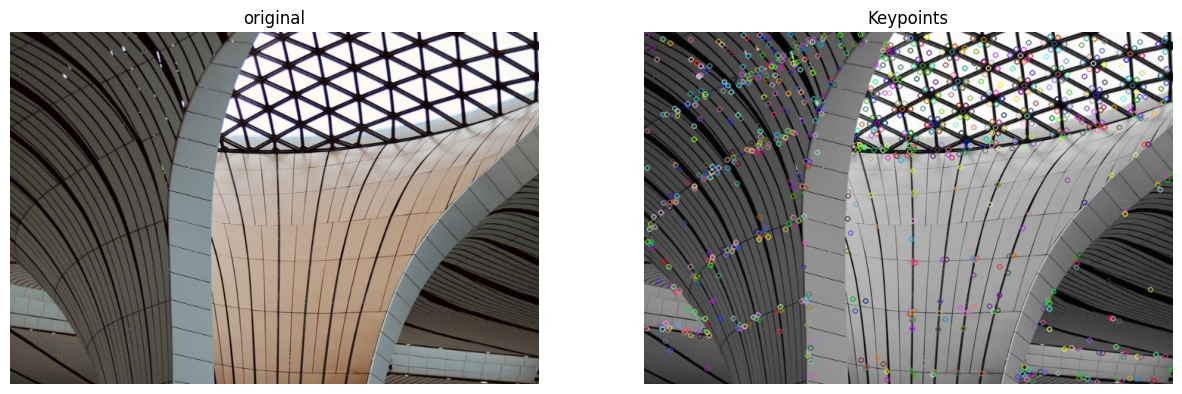

In [2]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Keypoints')
plt.show()

In [3]:
# pass flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS to cv2.drawKeypoints() as a parameter.
import cv2

img = cv2.imread('./images/sift_keypoints2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img3=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow("Keypoints", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

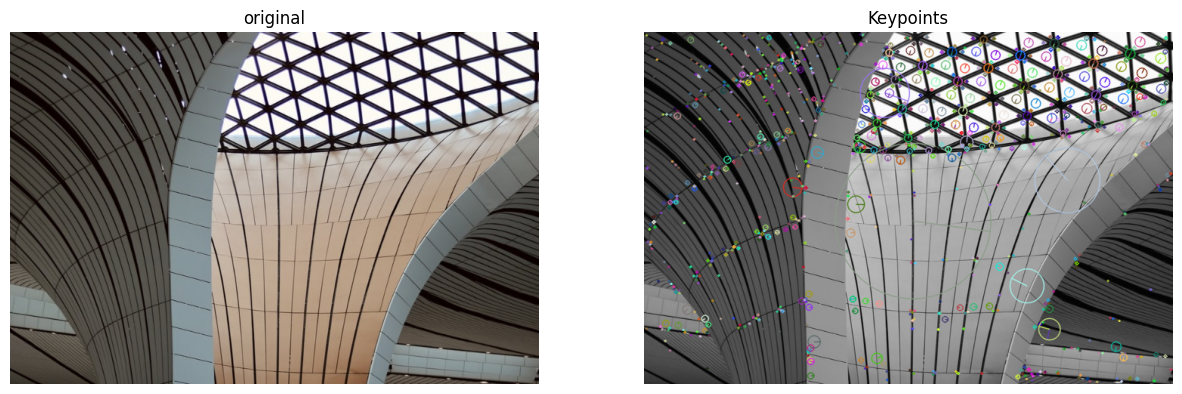

In [4]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Keypoints')
plt.show()

keypoint: 413 descriptor: (413, 128)


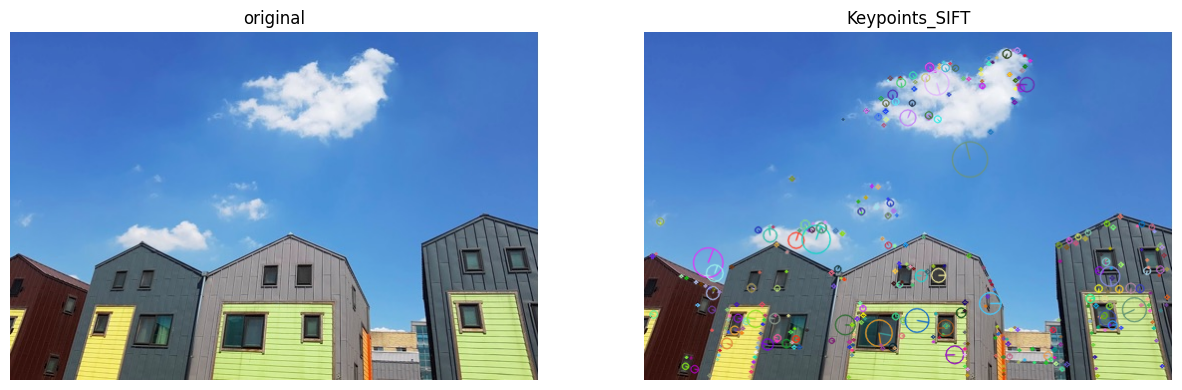

In [1]:
# SIFT desc_sift.py

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/practice_img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create() 
keypoints, descriptor = sift.detectAndCompute(gray, None) 
print('keypoint:',len(keypoints), 'descriptor:', descriptor.shape)
# print(descriptor)

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Keypoints_SIFT')
plt.show()

- If you look at the output results, you can see that there are a total of 413 feature points.   
- And 128 feature descriptor values are used for each feature point.  

## ▶ SURF (Speeded-Up Robust Features)   

SIFT uses image pyramids to solve the problem of detecting features with changes in size, which has the disadvantage of being slow.   
SURF is an algorithm that improves performance by__ changing the size of the filter__ instead of a pyramid of images.   

SIFT는 크기 변화에 따른 특징 검출 문제를 해결하기 위해 이미지 피라미드를 사용하므로 속도가 느리다는 단점이 있습니다.   
SURF는 이미지 피라미드 대신 필터의 크기를 변화시키는 방식으로 성능을 개선한 알고리즘입니다.   

OpenCV provides SURF functionalities just like SIFT.   
You initiate a SURF object with some optional conditions like 64/128-dim descriptors, Upright/Normal SURF etc.   
Then as we did in SIFT, we can use SURF.detect(), SURF.compute() etc for finding keypoints and descriptors.  

**detector = cv2.xfeatures2d.SURF_create(hessianThreshold, nOctaves, nOctaveLayers, extended, upright)**  

>- hessianThreshold(optional): Feature Extraction Boundary Values 특징 추출 경계 값 (default=100)
>- nOctaves(optional): Number of image pyramid layers 이미지 피라미드 계층 수 (default=3)
>- nOctaveLayers: Number of octave layers within each octave.    
>- extended(optional): descriptor flag (default=False), True: 128, False: 64
>- upright(optional): direction flag (default=False), True: ignore, False: apply

keypoint: 202 descriptor: (202, 128)


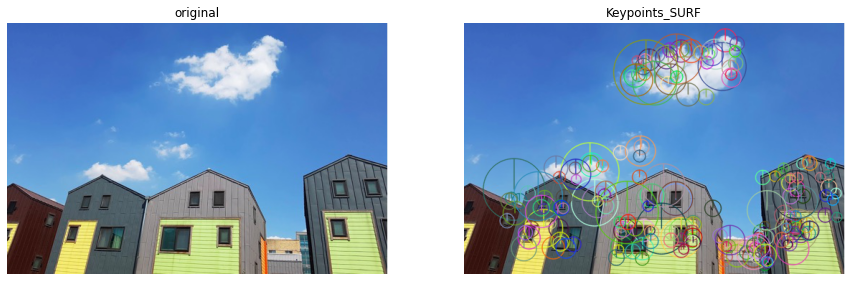

In [4]:
# SURF desc_surf.py  cv-py36

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/practice_img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(1000, 3, 2, True, True)
keypoints, desc = surf.detectAndCompute(gray, None)
print('keypoint:',len(keypoints), 'descriptor:', desc.shape)

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SURF', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Keypoints_SURF')
plt.show()

## ▶ ORB (Oriented FAST and Rotated BRIEF)

The Oriented FAST and rotated BRIEF (ORB) algorithm is a combination of the following 3 algorithms:   
- FAST (Features from Accelerated Segment Test) algorithm
- BRIEF (Binary Robust Independent Elementary Features) algorithm
- Harris Connor algorithm.

ORB(Oriented FAST and rotated BRIEF) 알고리즘은   
- FAST(Features from Accelerated Segment Test) 알고리즘,   
- BRIEF(Binary Robust Independent Elementary Features) 알고리즘,   
- 해리스 코너 알고리즘을 결합한 알고리즘입니다.  

### ■ FAST(Features from Accelerated Segment Test)   

- The FAST algorithm is a feature detector algorithm proposed by Rosten and Drummond that compares pixel P with a set of pixels on a small circle around the pixel.  
- Apply a threshold to the pixels around pixel P and classify them as dark, light, and similar pixels, so that the pixels on the circle must be continuously dark or light, and this continuity should be at least half.  
- If this condition is satisfied, the pixel can be considered a superior feature.    

        - FAST 알고리즘은 Rosten과 Drummond가 제안한 피처 검출기 알고리즘으로서 픽셀 P와 픽셀 주변의 작은 원 위에 있는 픽셀의 집합을 비교하는 방식입니다.  
        - 픽셀 P의 주변 픽셀에 임곗값을 적용해 어두운 픽셀, 밝은 픽셀, 유사한 픽셀로 분류해 원 위의 픽셀이 연속적으로 어둡거나 밝아야 하며 이 연속성이 절반 이상이 돼야 합니다.  
        - 이 조건을 만족하는 경우 해당 픽셀은 우수한 특징점으로 볼 수 있다는 개념입니다.

### ■ BRIEF(Binary Robust Independent Elementary Features)    

- The BRIEF algorithm was developed by Calonder researchers and is also known as the Calonder Feature  
- __BRIEF is a descriptor extractor that does not support feature detection.__   
- This algorithm is used to generate a descriptor for the detected feature point, __not an algorithm that detects the key point__.  
- Find which part of the pixel is brighter in the area around the feature point compared to other pixels and save it in binary format.
- Convoluted images using a Gaussian kernel, calculating the first and second points from the Gaussian distribution around the center of the feature to generate a pair of all pixels.
- In other words, it is a way of grouping two pixels into a group.    

        - BRIEF 알고리즘은 Calonder 연구진이 개발해 Calonder Feature 라고도 불립니다
        - 이 알고리즘은 Key Point을 검출하는 알고리즘이 아닌 검출된 특징점에 대한 Descriptor를 생성하는 데 사용합니다.
        - 특징점 주변 영역의 픽셀을 다른 픽셀과 비교해 어느 부분이 더 밝은지를 찾아 이진 형식으로 저장합니다.
        - 가우시안 커널을 사용해 이미지를 컨벌루션 처리하며, 피처 중심 주변의 가우스 분포를 통해 첫 번째 지점과 두 번째 지점을 계산해 모든 픽셀을 한 쌍으로 생성합니다.
        - 즉, 두 개의 픽셀을 하나의 그룹으로 묶는 방식입니다.

### ■ ORB (Oriented FAST and Rotated BRIEF)  

__BRIEF is a descriptor extractor that does not support feature detection.__ 
The algorithm that has been improved to __take orientation and rotation__ into account in this BRIEF is the ORB.   
- The algorithm __uses FAST as the feature detection algorithm__ and has been improved to take into account rotation and orientation.   
- It's also fast, so it's a good alternative to SIFT and SURF.  

        BRIEF는 특징점 검출은 지원하지 않는 디스크립터 추출기입니다. 
        이 BRIEF에 방향과 회전을 고려하도록 개선한 알고리즘이 바로 ORB입니다.   
        - 이 알고리즘은 특징점 검출 알고리즘으로 FAST를 사용하고 회전과 방향을 고려하도록 개선했으며   
        - 속도도 빨라 SIFT와 SURF의 좋은 대안으로 사용됩니다.  

- **detector = cv2.ORB_create(nfeatures, scaleFactor, nlevels, edgeThreshold, firstLevel, WTA_K, scoreType, patchSize, fastThreshold)**  

>- nfeatures(optional): Maximum number of features to detect 검출할 최대 특징 수 (default=500)
>- scaleFactor(optional): Image Pyramid Ratio 이미지 피라미드 비율 (default=1.2)
>- nlevels(optional): Image Pyramid levels 이미지 피라미드 계층 수 (default=8)
>- edgeThreshold(optional): Border size to exclude from search, match patchSize 검색에서 제외할 테두리 크기, patchSize와 맞출 것 (default=31)
>- firstLevel(optional): The first image pyramid hierarchy step 최초 이미지 피라미드 계층 단계 (default=0)
>- WTA_K(optional): Number of random coordinates generated 임의 좌표 생성 수 (default=2)
>- scoreType(optional): method to use for feature detection (cv2.ORB_HARRIS_SCORE(default), cv2.ORB_FAST_SCORE: FAST)
>- patchSize(optional): patch Size디스크립터의 패치 크기 (default=31)
>- fastThreshold(optional): FAST Threshold (default=20)

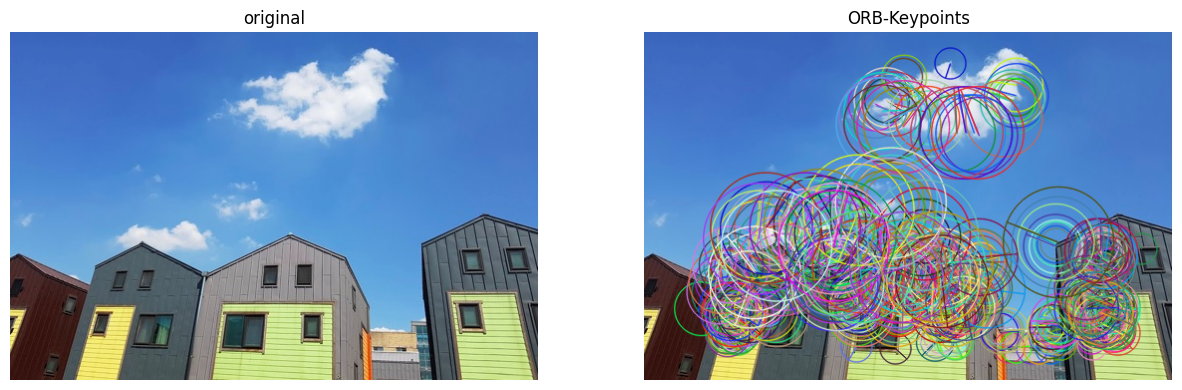

In [2]:
# ORB desc_orb.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create() 
keypoints, descriptor = orb.detectAndCompute(img, None) 
img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('ORB', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('ORB-Keypoints')
plt.show()

You can try ORB (Oriented FAST and Rotated BRIEF) as an alternate to SURF in open cv.   
It almost works as good as SURF and SIFT and it's free unlike SIFT and SURF which are patented and can't be used commercially.  

➡️ **Starting with OpenCV 4, the SIFT algorithm and the SURF algorithm are not supported.**

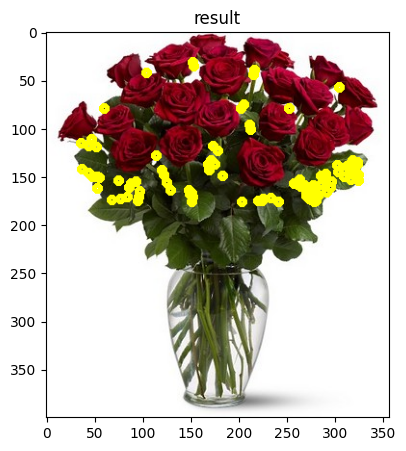

In [11]:
import cv2
import numpy as np

src = cv2.imread("./images/practice_img/roses.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
target = cv2.imread("./images/practice_img/roses.jpg", cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create(
    nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,
)

kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(target, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

for i in matches[:100]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(src, (int(x1), int(y1)), 3, (0, 255, 255), 3)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=100)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('result')
plt.show()

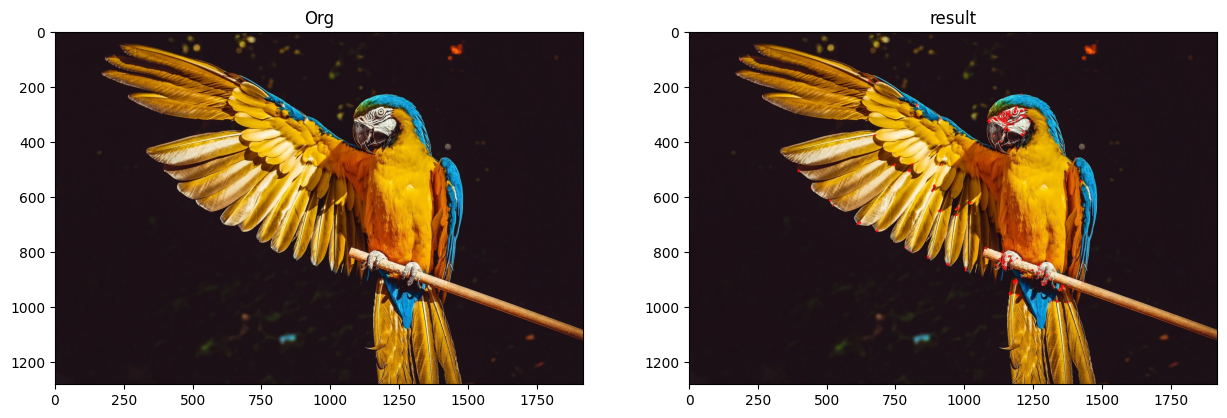

In [9]:
import numpy as np
import cv2
filename = './images/practice_img/bird1.webp'
img = cv2.imread(filename, cv2.COLOR_BGR2GRAY)
img2 = None
orb = cv2.ORB_create()
kp, des = orb.detectAndCompute(img, None)
img2 = cv2.drawKeypoints(img, kp, None, (0,0,255), flags=0)
cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('Org')
plt.subplot(122),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('result')
plt.show()

## ▶ Liquify  

Many people take selfies and then use apps to retouch them.   
- Grow your eyes and shave your chin. This feature is called **Liquify.**     
- In other words, __the function of making only the desired part of the image smaller or larger is called liquify.__  

<img src = './images/practice_img/liquify.png' width=400 height=400>

Divide the rectangular area into 4 triangular zones. Place the mouse at the intersection in the middle.   
When you drag the mouse, the position of the intersection changes to the right. This will change the size of each of the four triangles.   
I convert each of the four triangles.

        많은 사람들이 셀카를 찍은 뒤 어플을 이용해 보정하곤 합니다.   
        눈을 키우고 턱을 깎죠. 이런 기능을 리퀴파이(Liquify)라고 합니다.   
        즉, 이미지의 원하는 부분만 작게 하거나 크게 하는 기능을 리퀴파이라고 합니다.   

        사각형 영역을 4개의 삼각형 영역으로 나눕니다. 마우스의 위치를 가운데 교차점으로 둡니다.   
        마우스를 드래그하면 교차점의 위치가 오른쪽과 같이 변합니다. 그러면 각 4개의 삼각형의 크기가 바뀝니다.   
        4개의 삼각형에 대해서 각각 어핀 변환합니다.

In [20]:
# liquify_tool.py

import cv2
import numpy as np

win_title = 'Liquify'   
half = 50               # roi size
isDragging = False      

def liquify(img, cx1,cy1, cx2,cy2) :
    x, y, w, h = cx1-half, cy1-half, half*2, half*2            # set coor and size  좌표와 크기 설정
    roi = img[y:y+h, x:x+w].copy()                            
    out = roi.copy()
    offset_cx1,offset_cy1 = cx1-x, cy1-y                # reset coord from the roi
    offset_cx2,offset_cy2 = cx2-x, cy2-y
    
    # 4 triangle coordinates before transform 
    tri1 = [[ (0,0), (w, 0), (offset_cx1, offset_cy1)],             # top
            [ [0,0], [0, h], [offset_cx1, offset_cy1]],             # left
            [ [w, 0], [offset_cx1, offset_cy1], [w, h]],            # right
            [ [0, h], [offset_cx1, offset_cy1], [w, h]]]            # bottom

    # after transform
    tri2 = [[ [0,0], [w,0], [offset_cx2, offset_cy2]], 
            [ [0,0], [0, h], [offset_cx2, offset_cy2]], 
            [ [w,0], [offset_cx2, offset_cy2], [w, h]], 
            [ [0,h], [offset_cx2, offset_cy2], [w, h]]] 
    
    for i in range(4):
        matrix = cv2.getAffineTransform( np.float32(tri1[i]), np.float32(tri2[i]))  # Affine Transform
        warped = cv2.warpAffine( roi.copy(), matrix, (w, h), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
        mask = np.zeros((h, w), dtype = np.uint8)                    # triangle shape mask 
        cv2.fillConvexPoly(mask, np.int32(tri2[i]), (255,255,255))
        warped = cv2.bitwise_and(warped, warped, mask=mask)
        out = cv2.bitwise_and(out, out, mask=cv2.bitwise_not(mask))
        out = out + warped
        
    img[y:y+h, x:x+w] = out   # combine roi with original img
    return img 

def onMouse(event,x,y,flags,param):     
    global cx1, cy1, isDragging, img      
    if event == cv2.EVENT_MOUSEMOVE:  
        if not isDragging :
            img_draw = img.copy()       
            cv2.rectangle(img_draw, (x-half, y-half), (x+half, y+half), (0,255,0),3)  # drag area
            cv2.imshow(win_title, img_draw) 
    elif event == cv2.EVENT_LBUTTONDOWN :   
        isDragging = True                   
        cx1, cy1 = x, y                     
    elif event == cv2.EVENT_LBUTTONUP :
        if isDragging:
            isDragging = False             
            liquify(img, cx1, cy1, x, y)   
            cv2.imshow(win_title, img)

if __name__ == '__main__' :
    img = cv2.imread('./images/practice_img/actor.jpg')
    img_org = img.copy()
    h, w = img.shape[:2]

    cv2.namedWindow(win_title)
    cv2.setMouseCallback(win_title, onMouse) 
    cv2.imshow(win_title, img)
    while True:
        key = cv2.waitKey(1)
        if key & 0xFF == 27:
            break
    cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Liquified'),plt.axis('off')
plt.show()